In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.modeling import models, fitting
from specim.specfuncs import spec1d

In [2]:
data =  spec1d.Spec1d('../HE0435_spec.fits', informat='mwa')
lamda_galaxy = data['wav']
spectra_galaxy = data['flux']
variance_spectra_galaxy = data['var']


Reading spectrum from ../HE0435_spec.fits
Expected file format: mwa
 Spectrum Start:  5570.31
 Spectrum End:     7899.01
 Dispersion (1st pixel):   0.58
 Dispersion (average):      0.58



In [3]:
#%matplotlib notebook
#plt.plot(lamda_galaxy, variance_spectra_galaxy)

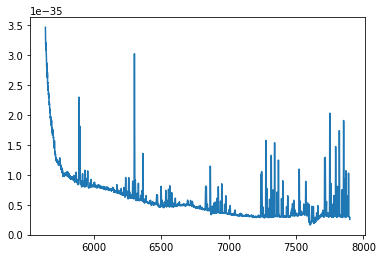

In [4]:
plt.plot(lamda_galaxy[120:], variance_spectra_galaxy[120:])

### Below is the list of emission lines (in terms of wavelength) we would like to fit with a Gaussian distribution. The tuples contains start and end value of the wavelength range for thses emission lines. However they are not the exact wavelength data points in the spectra as we have collected these wavelength values from the zoomed out plot of the emission lines. So we have to replace these wavelength values with the closest wavelengths values from the spectra.

In [5]:
emission_lines = [(5886.0, 5893.25), (5893.33, 5899.71), (6295.21, 6304.2), (6360.25, 6367.24), 
                  (6860.0, 6868.0), (7272.87, 7279.34), (7337.86, 7343.58), (7708.93, 7721.36), 
                  (7747.03, 7754.21), (7818.38, 7824.53), (7850.85, 7856.09)] 

In [6]:
exact_emission_lines = []
index = []
for i,p in enumerate(emission_lines):
    a = abs(lamda_galaxy - p[0])
    b = abs(lamda_galaxy - p[1])
    a_list = a.tolist()
    b_list = b.tolist()
    start = lamda_galaxy[a_list.index(min(a))]
    stop = lamda_galaxy[b_list.index(min(b))]
    exact_emission_lines.append((start, stop))
    index.append((a_list.index(min(a)), b_list.index(min(b))))

In [7]:
print("emission_lines : \n")
[print(*line) for line in emission_lines]
print("\nexact_emission_lines : \n")
[print(*line) for line in exact_emission_lines]

emission_lines : 

5886.0 5893.25
5893.33 5899.71
6295.21 6304.2
6360.25 6367.24
6860.0 6868.0
7272.87 7279.34
7337.86 7343.58
7708.93 7721.36
7747.03 7754.21
7818.38 7824.53
7850.85 7856.09

exact_emission_lines : 

5885.8278710899585 5893.367871089958
5893.367871089958 5899.747871089957
6295.307871089907 6304.007871089906
6360.267871089899 6367.227871089898
6860.227871089836 6867.767871089835
7272.607871089785 7279.567871089784
7338.147871089776 7343.367871089776
7708.76787108973 7721.527871089728
7747.047871089725 7754.007871089724
7818.387871089716 7824.767871089715
7850.867871089712 7856.087871089711


[None, None, None, None, None, None, None, None, None, None, None]

In [8]:
# empty list to contain data of these emission lines 
data_emission = []           
lamda_emission = [] 

### Collecting the variance on spectra data for specific range of wavelengths of the emission lines to fit with Gaussian distribution.

In [9]:
lam_list = lamda_galaxy.tolist()                   # converting array to list
var_spec_list = variance_spectra_galaxy.tolist()   # contains variance on spectra data

for i,p in enumerate(exact_emission_lines):
    start = lam_list.index(p[0])
    stop  = lam_list.index(p[1])
    var_spec = var_spec_list[start:stop+1]   # slicing and collecting data for the wavelength range
    lam = lam_list[start:stop+1]
    data_emission.append(var_spec)
    lamda_emission.append(lam)

### Here is the plot of emission lines we are going to fit

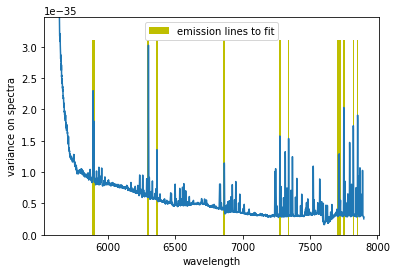

In [10]:
s=np.zeros(len(lamda_emission))
w= np.zeros(len(lamda_emission))
for i,p in enumerate(lamda_emission):
    s[i]= np.median(p)
    w[i]= len(p)

plt.plot(lamda_galaxy[120:], variance_spectra_galaxy[120:])
plt.bar(s, height=max(variance_spectra_galaxy[130:]), width=w, color='y', label='emission lines to fit')
plt.xlabel('wavelength')
plt.ylabel('variance on spectra')
plt.legend()
plt.show()

In [11]:
model_gauss = models.Gaussian1D()           # calling the Gaussian model 
fitter_gauss = fitting.LevMarLSQFitter()    # Calling the fitting scheme 

###  Here we are going to fit each emission line data individually. Before fit we have normalized the flux with the median value of the data of each emission lines. Then we have shifted both the x and y axis of the data. The y axis has been shifted by subtracting the minimum value of the data array so that it touch the x axis. And the x axis has been shifted by the median value of the data array.

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    1.192654614045878 0.2587494306145398 1.1550875458341565


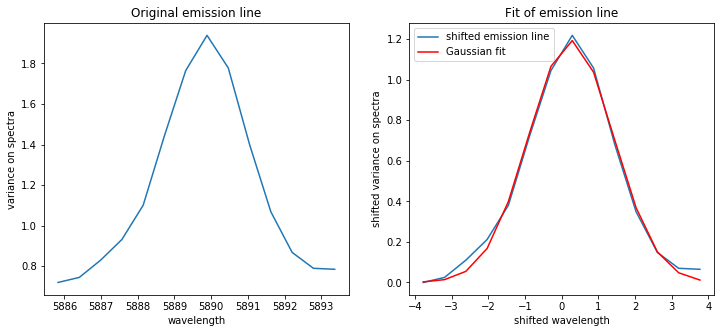

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.8954408261698262 -0.689645141085573 1.0645697649533408


<Figure size 432x288 with 0 Axes>

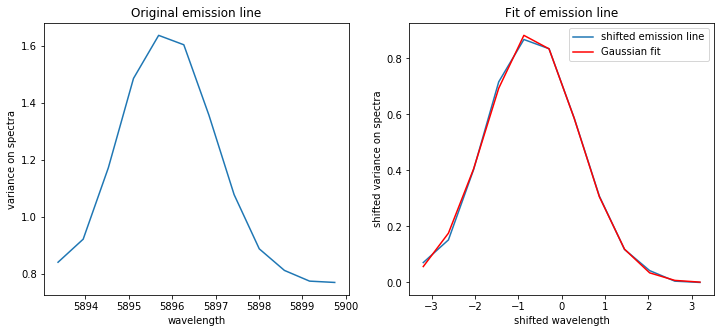

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    2.8693487155452844 0.7308046749347408 1.0983957034846485


<Figure size 432x288 with 0 Axes>

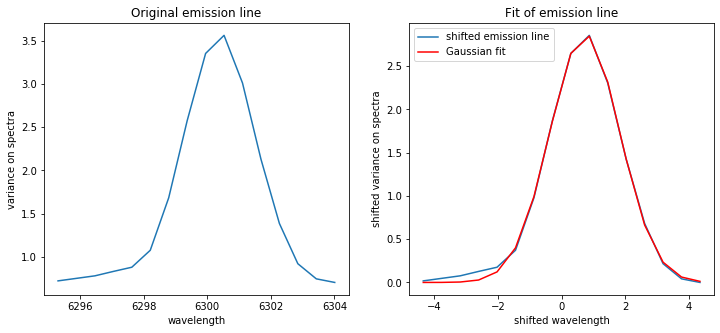

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    1.1379721228659534 0.15380526948856435 1.0468137747133617


<Figure size 432x288 with 0 Axes>

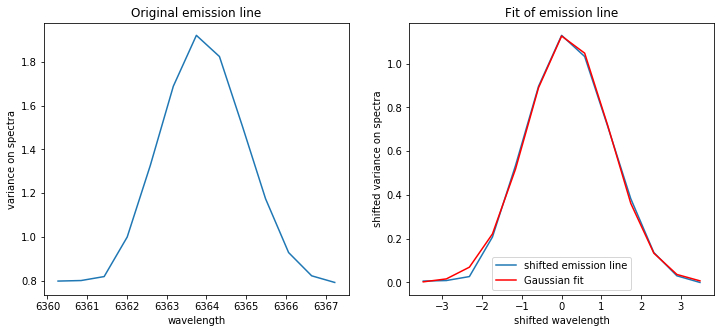

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev     
    ------------------ -------------------- -----------------
    1.6630440010174845 -0.10093493688055544 1.019500286702387


<Figure size 432x288 with 0 Axes>

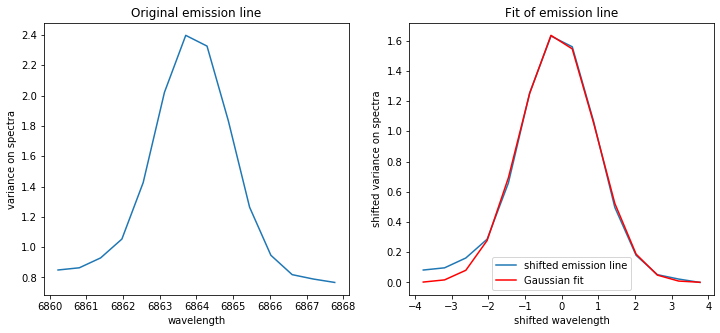

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    2.9653892756087927 0.14917370299686522 0.9027695905251228


<Figure size 432x288 with 0 Axes>

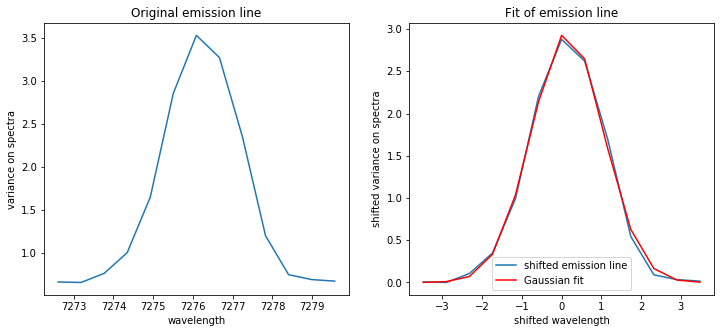

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    2.221116511639159 0.07876507314532974 0.8366778811060959


<Figure size 432x288 with 0 Axes>

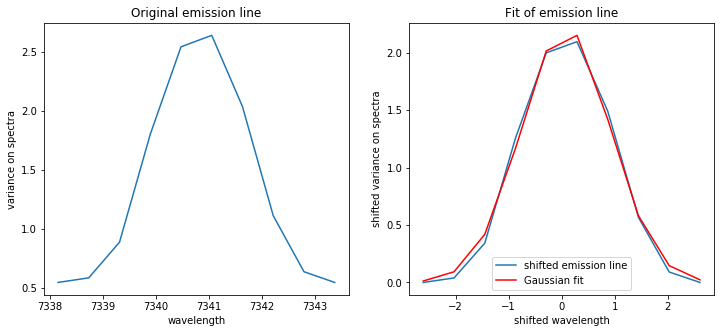

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ -------------------- ------------------
    1.2007571088767044 -0.06596609032706453 3.0763534325845714


<Figure size 432x288 with 0 Axes>

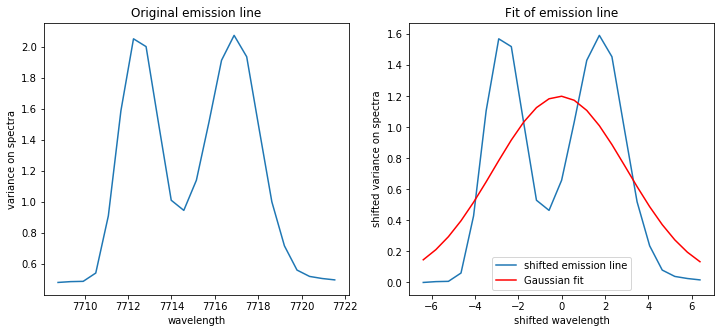

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    3.495095015006644 0.08051566409972119 0.8915048252597821


<Figure size 432x288 with 0 Axes>

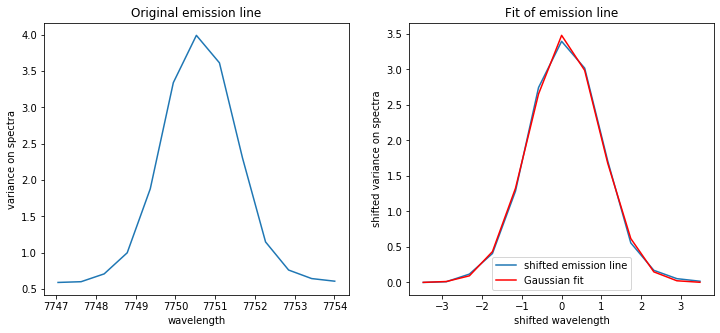

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ -------------------- ------------------
    2.9636654092580903 -0.08200422841003628 0.8677557823924273


<Figure size 432x288 with 0 Axes>

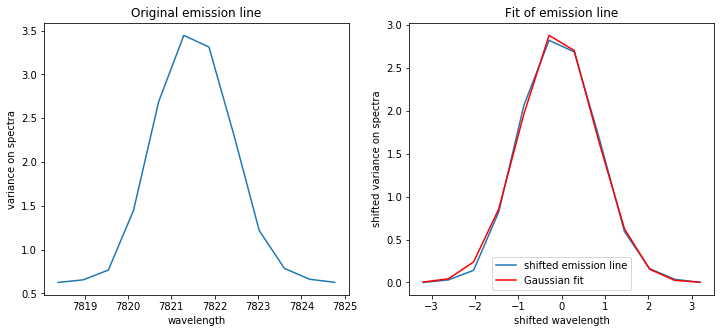

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ -------------------- ------------------
    2.1867609379011266 -0.12992810541128733 0.8907538725255199


<Figure size 432x288 with 0 Axes>

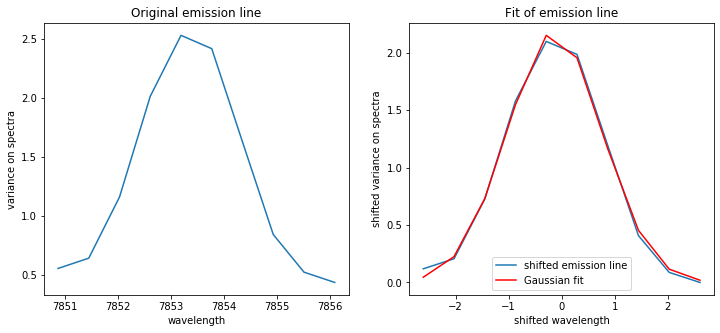

<Figure size 432x288 with 0 Axes>

In [12]:
best_fit = []
for i,p in enumerate(data_emission):
    data_emission[i] = data_emission[i] / np.median(data_emission[i])
    x= lamda_emission[i] - np.median(lamda_emission[i])
    y= data_emission[i] - np.min(data_emission[i])
    
    best_fit_gauss = fitter_gauss(model_gauss, x, y)
    best_fit.append(best_fit_gauss)
    
    print(best_fit_gauss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(lamda_emission[i], data_emission[i])
    ax1.set_title('Original emission line')
    ax1.set_xlabel('wavelength')
    ax1.set_ylabel('variance on spectra')
    
     
    ax2.plot(x, y, label='shifted emission line') 
    ax2.plot(x, best_fit_gauss(x), 'r', label='Gaussian fit')
    ax2.set_title('Fit of emission line')
    ax2.set_xlabel('shifted wavelength')
    ax2.set_ylabel('shifted variance on spectra')
    plt.legend()
    plt.show()
    plt.figure()

In [22]:
# Calculating the average value of the std_dev. But we are excluding the std_dev value of 3.07.
s= 0
for i,p in enumerate(best_fit):
    s += p.stddev.value
    #print(i)
print('average : %f' %((s-3.07)/ i))

average : 0.978018
